# Predicting Audience Engagement With Online News Content
### or "How I Learned to Forget the Goal and Enjoy the Process"

***

### Author: Neil Lukowski

***

## Table of Contents
* [Why This Dataset?](#Why-This-Dataset?)
* [Is Salacious Really The Most Engaging Content?](#Is-Salacious-Really-The-Most-Engaging-Content?)
* [Gleaning Data](#Let's-bring-this-data-into-the-mine-and-see-what-treasures-we-can-glean.)
* [Painting Pictures of Data](#Painting-Pictures-of-Data)
* [Plots vs Shares](#Plots-vs-Shares)
* [Data Scientist's Editorial Aside](#Data-Scientist's-Editorial-Aside)
* [Let The Testing Begin](#Let-The-Testing-Begin)
* [Model 1 Residuals](#Check-the-Residuals)
* [Using Another Model](#Let's-try-a-Decision-Tree)
* [Not Giving Up](#Not-giving-up-just-yet...)
* [Conclusions](#Conclusions)
* [Three Things Learned](#Three-Things-Learned)
* [Three Good Questions](#Three-Good-Questions)
* [Implemented Suggestions](#Implemented-Suggestions)
* [Acknowledgments](#Acknowledgments)
* [Citations](#Citations)

***

### Why This Dataset?

Analysis of website traffic is one of the best ways to determine the pattern of consumer behavior. The proliferation of tracking cookies in browsers attests to the value of this information to the site owner. For online news providers that operate on advertising revenue, knowing the habits and viral engagement of their audience helps determine the format and content to best suit their taste. This particular dataset compares several metrics with the target being to predict the number of shares a particular article received.

[Top](#Table-of-Contents)

### Is Salacious Really The Most Engaging Content?

The purpose of this dataset was to predict the popularity of a a news article as evidenced by how much the audience shared it with others. A quick examination of the source site and data headers indicates that there is a possibility that may titles or topics are polarizing in some form. A scan of article topics include politics, religion, sex, science, Wall Street and Hollywood. Is there a correlation between the polarization of a particular topic and the engagement with the audience? Is it possible that the more an article tilts to one extreme people may be more apprehensive to share it with others? I would imagine people would be uncertain how a particularly touchy subject would be perceived by the recipient. Utilizing the polarity features of the dataset it may be possible to predict audience interaction.

[Top](#Table-of-Contents)

### Let's bring this data into the mine and see what treasures we can glean.

In [307]:
# Bringing in the tools at our disposal
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# After discovering KeyErrors due to spaces in the column headers,
# I found a solution on how to handle the extra space when importing
# here https://stackoverflow.com/questions/35831496/key-error-when
#   -selecting-columns-in-pandas-dataframe-after-read-csv
# with the followng options suggested by user MaxU

news_df = pd.read_csv("OnlineNewsPopularity.csv" , sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')

Let's take a look at the variables at our disposal and if there are any potential problem spots that might slow us down.

In [308]:
news_df.info() #Checking to see if there are any potential snags

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

Looking over the data types by using the .info() method, the 'url' column is composed of objects, while everything else is numerical. There may be interesting information that can be obtained by categorizing groups of words in the urls, but that is not what we are looking for today...so let's drop them.

In [309]:
newsnoadd_df = news_df.drop(columns = ["url"]) #getting rid of url column of objects

[Top](#Table-of-Contents)

### Painting Pictures of Data

What I want to do is try to compare as many features against the target as I can. I know Seaborn has a way to generate multiple plots in one line of code, but there may be too many variables (60, in this case) for it to be practical (60 x 60 = 3600 plots). I found an elegant way to graphically display these relationships and have presented it below.

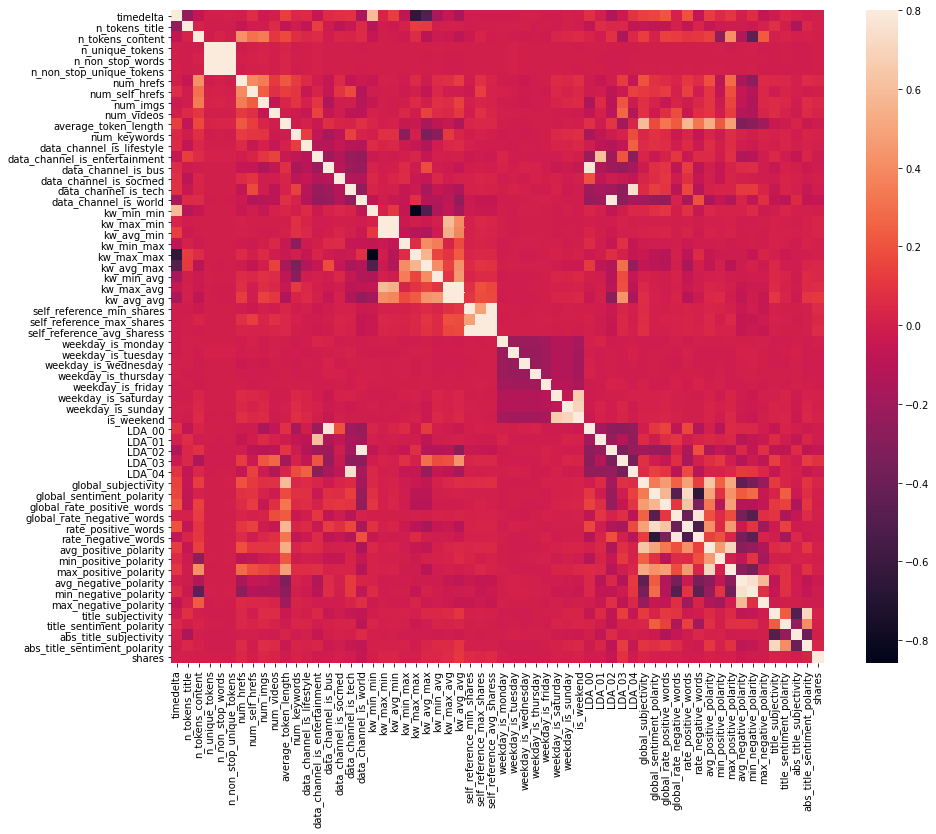

In [310]:
# This remarkable way of visualizing relationships between features was found here 
# https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
# in the notebook titled COMPREHENSIVE DATA EXPLORATION WITH PYTHON
# by Pedro Marcelino - February 2017

corrx = newsnoadd_df.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrx, vmax=.8, square=True);

Looking at these relationships, it becomes apparent that "shares" has very little direct relationships with the other features of the dataset. The color is nearly uniform in the bottom-most and right-most lines, with slight hot spots appearing at the intersection with "kw_avg_avg" and again with "LDA_03". Kw_avg_avg is described as "Avg. keyword (avg. shares)" and LDA_03 is defined as "Closeness to LDA topic 3" which makes gleaning insight from apparent relationships with "shares" difficult as I'm not overly familiar with what "LDA topic 3" is.

[Top](#Table-of-Contents)

### Plots vs Shares.

The goal here is not to find out hidden relations between the variables...but instead to see how they affect one target variable, "shares". What would be handy would be plotting every variable versus "shares" one at a time so each could be evaluated...which is what I did. 

I'm including this because it took so long to figure out and it may be helpful in the future...even if it does not prove too helpful at the present.

In [311]:
# Converting all columns into a format that pairplot can utilize. 

# I think I found the solution in the documentation and tried .tolist() on my own, but since I came back to it after other failed attempts and
# had this site open I will cite it just in case. https://stackoverflow.com/questions/37179155/how-to-convert-index-into-list

cols = newsnoadd_df.columns.tolist() #converts column index object to list

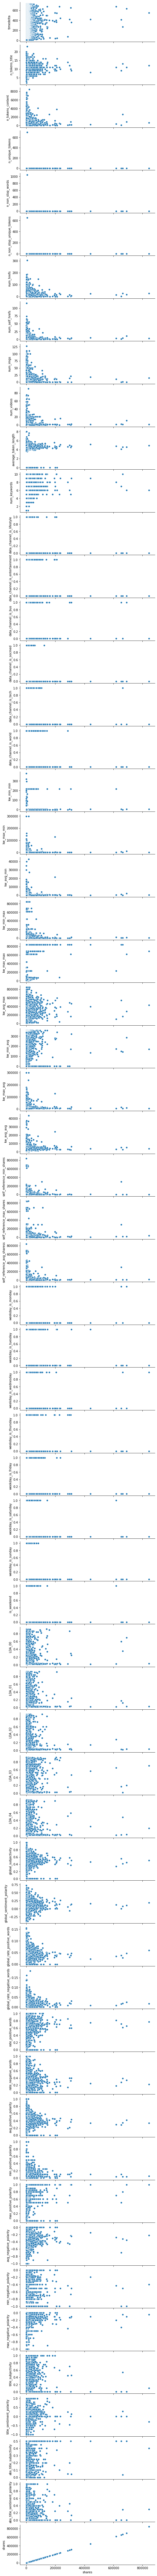

In [312]:
# Was having trouble remembering what this plot was called and how to do it. Found solution on the website
# https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166 posted by Will Koehrsen April 6, 2018

# At first I began by selecting y_vars that sounded interesting, but it became clear that this was tedious and there had to be a
# better way. I'm leaving the code commented out as evidence of how inefficient that process would have been.

# sns.pairplot(newsnoadd_df, height = 2, y_vars=["num_videos", 
#                                 "num_imgs", 
#                                "rate_positive_words",
#                                 "global_rate_positive_words",
#                                "rate_negative_words",
#                                 "global_rate_negative_words",
#                                 "abs_title_sentiment_polarity",
#                                 "abs_title_subjectivity"],
#                                 x_vars = ["shares"]);

# Instead, I take the 'cols' list and use it for my y_vars and then only use my target 'shares' as x_vars. 60 plots instead of 3600.

sns.pairplot(newsnoadd_df, height = 2, aspect = 3.5,
                      y_vars=cols,
                      x_vars = ["shares"]);

While that was an interesting exercise, it may still be guilty of providing too much information in one glance to be helpful. It was also difficult to find a way to label the x axis in each subplot.

Looking over the plots again, I noticed there may be some relationships to number of shares lurking in n_tokens_title, n_tokens_content, average_token_length, and rate_positive_words or rate_negative_word.

Perhaps zooming in on one that looks interesting may provide some better insight. Maybe positivity or negativity in an article affects someone's engagement with that article? Or perhaps there is a golden number of words in the body or title that strongly indicates the likelihood it will be sent to someone else. As an example, let's plot the rate of positive or negative words occurring in an article against the number of shares it receives.

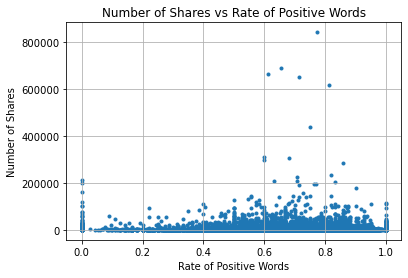

In [313]:
# Plotting Number of Shares versus Rate of Positive Words

shares = newsnoadd_df["shares"].values.reshape(-1,1)
poswords = newsnoadd_df["rate_positive_words"]
plt.scatter(poswords, shares, marker = '.')
plt.xlabel("Rate of Positive Words")
plt.ylabel("Number of Shares")
plt.title("Number of Shares vs Rate of Positive Words")
plt.grid(True)

The immediately apparent observation is that there are a few outliers which makes conclusively declaring a positive or negative correlation between these variables difficult. It does seem to show a left-skew distribution indicating that more positive articles are shared than negative ones. Let's do some testing.

[Top](#Table-of-Contents)

### Data Scientist's Editorial Aside

After running several tests below, I came to regret not immediately removing the outliers at this point. However, toward the end an attempt is made and comparisons to the unclean data are offered. It may be that by this point I am getting lost in the weeds of exploring the data and beginning to forget what the original goals and assumptions were. The process below provided an excellent example of the necessity for clean well-prepared data.

[Top](#Table-of-Contents)

### Let The Testing Begin

Let's make sure the number of shares is scaled appropriately for testing. Might as well go ahead and get target variable isolated while we are at it.

In [314]:
st_scaler = StandardScaler() # Building the scaler object

y = newsnoadd_df["shares"] # Isolating the target variable "Shares"

# Getting the test variables I've selected. 
# Thanks goes to the following site for showing how to do this.
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

X_df = newsnoadd_df[["n_tokens_title","n_tokens_content","average_token_length","rate_negative_words"]]

# Scaling the values of the selected variables

X_stand = pd.DataFrame(st_scaler.fit_transform(X_df), columns = X_df.columns.copy())
Y_stand = pd.DataFrame(st_scaler.fit_transform(newsnoadd_df), columns = newsnoadd_df.columns.copy())
y_stand = Y_stand["shares"]

Now that the data is prepared, let's split it into training and testing sets.

In [315]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_stand, y, test_size = 0.3)

Now let's bring in some sklean models to help make sense of all this.

In [316]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 5, weights = "uniform") # Creating the model

And now we fit the model to the training data and then score it.

In [317]:
print("KNearestNeighbors with 5 neighbors score on unclean training data.")
knn.fit(Xtrain, ytrain);
knn.score(Xtrain, ytrain)

KNearestNeighbors with 5 neighbors score on unclean training data.


0.16844009821574912

In [318]:
print("KNearestNeighbors with 5 neighbors score on unclean testing data.")
knn.score(Xtest, ytest)

KNearestNeighbors with 5 neighbors score on unclean testing data.


-0.12011887681077993

I wonder, does the target variable need to be scaled as well? Some research seems to indicate that it might be a good idea. The link below includes a discussion as to whether or not the target variable should be scaled as well. In case it matters, I have prepared a scaled target variable and split the data into testing and training data using all scaled values. This is then fit to the same model as above and scored for comparison.

https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re#:~:text=Yes%2C%20you%20do%20need%20to,making%20the%20learning%20process%20unstable.

In [319]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_stand, y_stand, test_size = 0.3)

In [320]:
print("KNearestNeighbors with 5 neighbors score on unclean training data, but with scaled target variable.")
knn.fit(Xtrain, ytrain);
knn.score(Xtrain, ytrain)

KNearestNeighbors with 5 neighbors score on unclean training data, but with scaled target variable.


0.18336441818406624

In [321]:
print("KNearestNeighbors with 5 neighbors score on unclean testing data, but with scaled target variable.")
knn.score(Xtest, ytest)

KNearestNeighbors with 5 neighbors score on unclean testing data, but with scaled target variable.


-0.08208826986508799

There is definitely a change in the score, but some cases are better than others so I am not sure what risk/reward there is in scaling the target. That is certainly something to research and learn more about.

* [Top](#Table-of-Contents)

### Check the Residuals

Let's plot the residuals to see what is going on with the data that might account for the score seen in the above section.

In [322]:
test_pred = knn.predict(Xtest) #predictions of the model on the testing data
resid = ytest - test_pred 

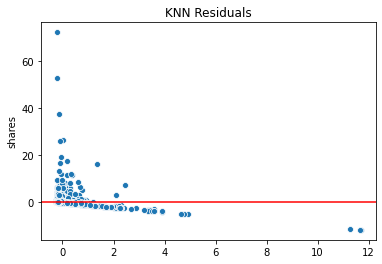

In [323]:
sns.scatterplot(x = test_pred, 
                y = resid)
plt.axhline(y = 0, color = "red", label = "y = 0")
plt.title("KNN Residuals")
plt.show()

Clearly there is an underlying pattern in the data that my KNearestNeighbors model is failing to account for.

From the scores and the residual plot alone it is pretty clear that this model is not particularly accurate. It seems to be under-fitting and missing some aspect of the data entirely. This may have something to do with my decision to only consider the features I believed to have some influence on the target. 

[Top](#Table-of-Contents)

### Let's try a Decision Tree

In [324]:
from sklearn.tree import DecisionTreeRegressor

dtr1 = DecisionTreeRegressor(max_depth=13)
dtr1.fit(Xtrain, ytrain);

print("Decision Tree with 13 max_depth score on unclean training data, but with scaled target variable.")
dtr1.score(Xtrain, ytrain)

Decision Tree with 13 max_depth score on unclean training data, but with scaled target variable.


0.6993481234770256

In [325]:
print("Decision Tree with 13 max_depth score on unclean testing data, but with scaled target variable.")
dtr1.score(Xtest, ytest)

Decision Tree with 13 max_depth score on unclean testing data, but with scaled target variable.


-0.2441857366049467

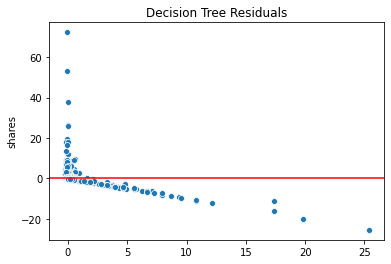

In [326]:
test_pred2 = dtr1.predict(Xtest) #predictions of the model on the testing data
resid2 = ytest - test_pred2

sns.scatterplot(x = test_pred2, 
                y = resid2)
plt.axhline(y = 0, color = "red", label = "y = 0")
plt.title("Decision Tree Residuals")
plt.show()

Again, after trying several different tree depths, the residuals are still not appearing close to "noisy".

I think that in both models my results are heavily influenced by the outliers as I did not account for them or attempt to remove them. At present there is a sense in which this process is becoming learned repetition but without knowing precisely when each step is supposed to be performed. Getting closer, but need more practice.

[Top](#Table-of-Contents)

### Not giving up just yet...implementing #1 suggestion.
I'm going to attempt to remove the outliers I believe are effecting my results the most. While I think this is principally due to "shares" over  250,000...I am going to see if there isn't a more precise way to find and remove the outliers of the whole dataframe.

Looking for a method to do this analysis and removal I found a process using scipy.stats.zscore to remove anything with a standard deviation greater than 3 which, according to the source below, is the definition of an outlier. The idea and code format was found on the following webpage.

https://www.kite.com/python/answers/how-to-remove-outliers-from-a-pandas-dataframe-in-python

In [327]:
import scipy as sp
z_scores = sp.stats.zscore(newsnoadd_df) # getting zScores of the dataframe
abs_z = np.abs(z_scores) #getting the absolute values
cleaned_data = (abs_z < 3).all(axis=1) #creating a new df of only data within 3 standard deviations
news_clean_df = newsnoadd_df[cleaned_data]

Now scaling the new cleaner data.

In [328]:
y2 = news_clean_df["shares"] # Isolating the target variable "Shares"

# Getting the test variables I've selected. 
# Thanks goes to the following site for showing how to do this.
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

X2_df = news_clean_df[["n_tokens_title","n_tokens_content","average_token_length","rate_negative_words"]]

# Generating a predictor df that includes all available variables for use below

predictors = news_clean_df.drop(columns = ["shares"])
predictors_stand = pd.DataFrame(st_scaler.fit_transform(predictors), columns = predictors.columns.copy())

# Scaling the values of the selected variables

X2_stand = pd.DataFrame(st_scaler.fit_transform(X2_df), columns = X2_df.columns.copy())
Y2_stand = pd.DataFrame(st_scaler.fit_transform(news_clean_df), columns = news_clean_df.columns.copy())
y2_stand = Y2_stand["shares"]

# Trying a logarithmic transformation of the target variable based upon Dr. Penland's suggestion
y2_trans = np.log1p(y2)

And now to train, test, fit, and score.

In [329]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X2_stand, y2_stand, test_size = 0.3) # 

print("KNearestNeighbors with 5 neighbors score on cleaned training data.")
knn.fit(Xtrain, ytrain);
knn.score(Xtrain, ytrain)

KNearestNeighbors with 5 neighbors score on cleaned training data.


0.2226315081090393

In [330]:
Xtrainlog, Xtestlog, ytrainlog, ytestlog = train_test_split(X2_stand, y2_trans, test_size = 0.3) # 

print("KNearestNeighbors with 5 neighbors score on cleaned training data. Utilizing log transformed target")
knn.fit(Xtrainlog, ytrainlog);
knn.score(Xtrainlog, ytrainlog)

KNearestNeighbors with 5 neighbors score on cleaned training data. Utilizing log transformed target


0.2231931187877363

In [331]:
print("KNearestNeighbors with 5 neighbors score on cleaned testing data.")
knn.score(Xtestlog, ytestlog)

KNearestNeighbors with 5 neighbors score on cleaned testing data.


-0.16212361630778815

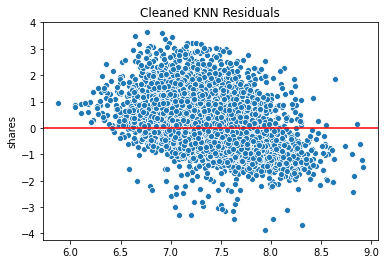

In [332]:
test_pred = knn.predict(Xtestlog) #predictions of the model on the testing data
resid = ytestlog - test_pred 

sns.scatterplot(x = test_pred, 
                y = resid)
plt.axhline(y = 0, color = "red", label = "y = 0")
plt.title("Cleaned KNN Residuals")
plt.show()

While that is MUCH better than the residuals without the cleaning process, this model still fails to account for some underlying patterns clearly showing in the plot above.

My curiosity still piquing...let's check the decision tree to see how much it has improved utilizing the log transform.

In [333]:
dtr1 = DecisionTreeRegressor(max_depth=13)

print("Decision Tree with 13 max_depth score on clean training data and scaled target variable.")
dtr1.fit(Xtrainlog, ytrainlog);
dtr1.score(Xtrainlog, ytrainlog)

Decision Tree with 13 max_depth score on clean training data and scaled target variable.


0.2928028207696558

In [334]:
print("Decision Tree with 13 max_depth score on clean testing data and scaled target variable.")
dtr1.score(Xtestlog, ytestlog)

Decision Tree with 13 max_depth score on clean testing data and scaled target variable.


-0.30919658723578314

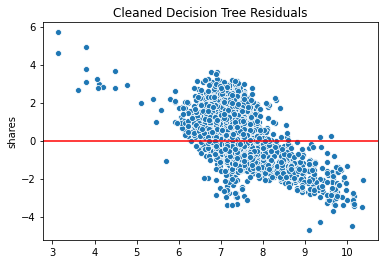

In [335]:
test_pred2 = dtr1.predict(Xtestlog) #predictions of the model on the testing data
resid2 = ytestlog - test_pred2

sns.scatterplot(x = test_pred2, 
                y = resid2)
plt.axhline(y = 0, color = "red", label = "y = 0")
plt.title("Cleaned Decision Tree Residuals")
plt.show()

Again, while better, there are still several unaccounted for influences on the model. The possible reasons will be discussed further in the conclusion section.

One last question in mind is what would using as many predictor variables as possible do to the decision tree score? Was this what the original model was intended to be?

In [336]:
Xtrain, Xtest, ytrain, ytest = train_test_split(predictors_stand, y2_stand, test_size = 0.3)

print("Decision Tree with 13 max_depth score on clean training data, scaled target variable, and all available features.")
dtr1.fit(Xtrain, ytrain)
dtr1.score(Xtrain, ytrain)

Decision Tree with 13 max_depth score on clean training data, scaled target variable, and all available features.


0.5716441974331036

In [337]:
print("Decision Tree with 13 max_depth score on clean testing data, scaled target variable, and all available features.")
dtr1.score(Xtest, ytest)

Decision Tree with 13 max_depth score on clean testing data, scaled target variable, and all available features.


-0.5728149121708197

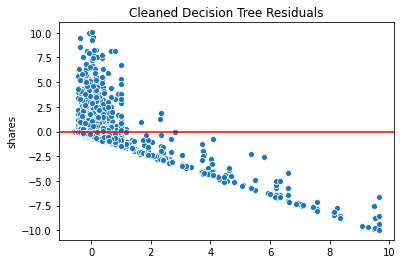

In [338]:
test_pred2 = dtr1.predict(Xtest) #predictions of the model on the testing data
resid2 = ytest - test_pred2

sns.scatterplot(x = test_pred2, 
                y = resid2)
plt.axhline(y = 0, color = "red", label = "y = 0")
plt.title("Cleaned Decision Tree Residuals")
plt.show()

It would appear that the model may be over-fitting the zero values as the score increased, but the residual looks almost identical to the previous one.

[Top](#Table-of-Contents)

### Conclusions

1. Try a log-transformation on your target and re-run at least 
one of the models? This sometimes gives the effect of scaling the target 
in a reasonable way.  
2. Try using a RandomForestRegressor or GradientBoostingRegressor.
Be careful not to fit on the testing data again. Only fit on the training data, then use
the testing data.
3. Try combining some of the models you have into a StackingRegressor or VotingRegressor.

Due to the large size of this data set and the nature of this project as a learning exercise, it is difficult to fully judge the efficacy of any model. The best tools in the novice's hand may only mar and blemish the piece...but a master could wield even the poorest of tools in such a way as to bring out a masterpiece. I can see that there is potentially an issue with using a linear regression on this type of data, but I cannot rule out my lack of experience for the poor scores it demonstrated.

The tendency of decision trees to over-fit began to evidence itself as it was easy to get higher scores by simply changing the depth, but the residuals clearly demonstrated an underlying pattern (or several). Looking at the plot above, the cluster along the y=0 line makes me wonder how do you account for the fact that many articles that could be predicted by their number of words or positive energy...are simply not shared. Not every article that is consumed and enjoyed is then passed along. Would it help to only focus on articles that had actual measured engagement? I am not sure.

The process of cleaning and preparing the data was evidenced during the completion of this project. These ideas are known intellectually and academically, but until this point have only been of relatively minor issue due to the smaller dataset sizes. Experience with this size and scope of information drove home the need to have well-prepared data.

Several questions also arose through the gradual tinkering with the models as well. The first being what effect does scaling the target data have on the model? Why would someone chose to do this or what would be the harm in doing it? Another question that came to mind was in relation to hyperparameter value selection...if changing the number of neighbors, or the max_depth directly affects the scoreing, how does one know what an appropriate number is so they do not over-fit? Perhaps the answer to this comes from research, experience, or both.

In the end, I don't believe I got any closer to predicting how many "shares" and article on Mashable.com would receive...but I do not believe that was the point. I did get closer to understanding the gradual and iterative approach to tweaking, tuning, and testing the data using the powerful tools at my disposal.

[Top](#Table-of-Contents)

### Three Things Learned

1. The first thing is I began to get a better grasp on what the training and test data are and how to utilize them. Originally I had a tendency to generate a new test and training set and keep them separated by unique variables. In my mind they were being changed or modified during a .fit() process or some other process we used. The programming background made me want to just make new variables. The scientist in me recognized that the scores between two different models are less conclusive if they did not work on the same subset of data. There was no real control in those cases.

2. The second thing would be a clearly strengthened mastery of the Jupyter notebook format. Manipulating the cells to display my thoughts in a cogent and organized fashion has been much easier during this process. The scale of this notebook, as well as the requirement for a table of contents with hyperlinks, made me realize it was desirable to add "top" links at the end of each section for quick navigation back to the table. This project also marked the first time I realized I could use my python programming skills to enhance the notebook in the form of helpful print() statements when the scores are generated.

3. The third thing would be my ability to utilize the documentation for the tools that I'm working with. When I attempted to run pairplot on 60 features...my laptop showed that Python began gobbling up RAM until it hit a maximum threshold and then remained locked trying to complete my request to generate 3600 plots. Having the desire to only see the one variable, "shares", plotted against all the others...it led me on a path through the flowering fields of documentation. Somewhere along the way, the matter-of-fact writing began to make sense and I was able to find my own solutions without hoping some other poor soul had sought the wisdom of the oft-merciless sages at Stackoverflow before me.

[Top](#Table-of-Contents)

### Three Good Questions

Two of these questions have been emailed already, but as they have yet to have a response I believe they qualify as legitimate project questions and will use them.

1. What is the reason why someone would or would not choose to scale their target variable? Doing so in this instance had a measurable effect on the model's results, and some would argue that it should be done, but what is the logic behind this argument?

2. Manipulation of Seaborn's pairplot function is possible but tricky. In this case I wanted to apply the same label, "shares", to the x-axis in each plot, but found the solution to require nested for-loops. Is there an easier way or more elegant tool to accomplish the same goal of 60 plots as I have done in this notebook? Would a for-loop across the columns have accomplished the same thing?

3. One requirement of the second model was to utilize feature selection, "human-centric" or automated. I began this project by selecting 4-5 features I thought evidenced some relationship with "shares" and proceeded from there. Was this an example of "human-centric" feature selection or is there another more clearly defined meaning behind the term? I assumed there was some domain knowledge aspect to the human approach, was this correct? When I realized that I may have done this backwards, I the utilized as many features as possible in a final test...was this what was originally intended for the initial modeling approach?

[Top](#Table-of-Contents)

### Implemented Suggestions

Suggestion #1 was to try a logarithmic transformation on the target variable and rerun with one of the models. This was accomplished above in the section titled "Not Giving Up Just Yet..." The transformed train_test_split is used here, for better or worse.

Another model that was suggested was the GradientBoostingRegressor.

In [339]:
from sklearn.ensemble import GradientBoostingRegressor

Xtrain, Xtest, ytrain, ytest = train_test_split(predictors_stand, y2_stand, test_size = 0.3)

reg = GradientBoostingRegressor()
reg.fit(Xtrain, ytrain)
reg.score(Xtrain, ytrain)

0.22321726796472663

In [340]:
reg.score(Xtest, ytest)

0.057717988678382515

Assuming the log transform from above was done on the correct variable form (original vs standard scaled), then I will assume the train_test_split from the previous sections will still be valid. If not, then there will surely be a lesson in organization of code and thoughts to be gotten from this.

In [341]:
reg.fit(Xtrainlog, ytrainlog);
reg.score(Xtrainlog, ytrainlog) 

0.05750743447282802

In [342]:
reg.score(Xtestlog, ytestlog)

0.02169897162087242

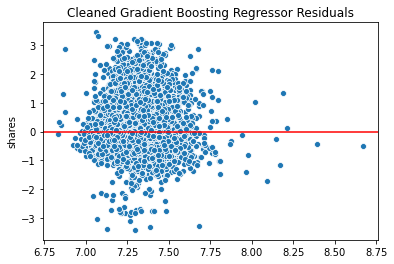

In [343]:
test_pred2 = reg.predict(Xtestlog) #predictions of the model on the testing data
resid2 = ytestlog - test_pred2

sns.scatterplot(x = test_pred2, 
                y = resid2)
plt.axhline(y = 0, color = "red", label = "y = 0")
plt.title("Cleaned Gradient Boosting Regressor Residuals")
plt.show()

I'll be honest, while this looks better than most of the residuals in the original project submission...I'm not I would know how to tweak the models to account for the points around 9.0 and 9.5 on the X axis.

Let's take a look at the final suggestion, the VotingRegressor.

In [344]:
from sklearn.ensemble import VotingRegressor

vote = VotingRegressor([('knn', knn), ('reg', reg)])
vote.fit(Xtrainlog, ytrainlog)
vote.score(Xtrainlog, ytrainlog)

0.18904691884815672

In [345]:
vote.score(Xtestlog, ytestlog)

-0.02086971989406905

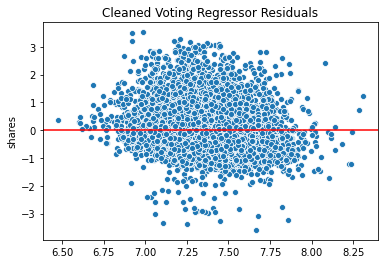

In [347]:
test_pred2 = vote.predict(Xtestlog) #predictions of the model on the testing data
resid2 = ytestlog - test_pred2

sns.scatterplot(x = test_pred2, 
                y = resid2)
plt.axhline(y = 0, color = "red", label = "y = 0")
plt.title("Cleaned Voting Regressor Residuals")
plt.show()

I would say that is the best residual result of all the models attempted. There is the possibility that I have made a mistake in my implementation of the logarithmic transformation, or in my used of the train_test_split of that transformed target. 

[Top](#Table-of-Contents)

### Acknowledgments
No other person provided direct input during the completion of this project. 2 emails were sent to Dr. Andrew Penland but were sent too late to have response in time to affect the progress of this work.

Signed: Neil Lukowski

Date: 10/16/2020

Revised: 11/2/2020

[Top](#Table-of-Contents)

   ### Citations
   
   This dataset was provided by and citation is given to...
   
   K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision
    Support System for Predicting the Popularity of Online News. Proceedings
    of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence,
    September, Coimbra, Portugal.

The following links are open on my browser or are recorded in my browsing history. These links may or may not have been listed above. In many cases the page was not the result I was looking for but in the spirit of academic honesty they are being listed as completely as possible.

* https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
* https://issue.life/questions/37612434
* https://stackoverflow.com/questions/33377243/seaborn-pairgrid-show-axes-labels-for-each-subplot
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
* https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
* https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
* https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py
* https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
* https://sebastianraschka.com/Articles/2014_ipython_internal_links.html
* https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
* https://catherineh.github.io/programming/2016/05/24/seaborn-pairgrid-tips
* https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
* https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.tolist.html
* https://pandas.pydata.org/pandas-docs/version/0.24.2/reference/api/pandas.Index.array.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_string.html
* https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.Index.str.html
* https://stackoverflow.com/questions/40950944/return-index-value-as-string
* https://stackoverflow.com/questions/31966494/compare-1-independent-vs-many-dependent-variables-using-seaborn-pairplot-in-an-h
* https://stackoverflow.com/questions/37179155/how-to-convert-index-into-list
* https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#reindexing-selection-label-manipulation
* https://pandas.pydata.org/pandas-docs/stable/reference/indexing.html
* https://stackoverflow.com/questions/14979224/indentation-error-in-python
* https://stackoverflow.com/questions/53717543/reduce-number-of-plots-in-sns-pairplot
* https://towardsdatascience.com/unsupervised-nlp-topic-models-as-a-supervised-learning-input-cf8ee9e5cf28
* https://realpython.com/python-keyerror/#:~:text=A%20Python%20KeyError%20exception%20is,t%20found%20in%20the%20mapping
* https://stackoverflow.com/questions/35831496/key-error-when-selecting-columns-in-pandas-dataframe-after-read-csv
* https://issue.life/questions/37612434
* https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
* https://seaborn.pydata.org/tutorial/axis_grids.html
* https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot
* https://seaborn.pydata.org/tutorial/relational.html
* https://www.kite.com/python/answers/how-to-remove-outliers-from-a-pandas-dataframe-in-python
* https://scikit-learn.org/stable/modules/tree.html#regression
* https://scikit-learn.org/stable/supervised_learning.html
* https://stats.stackexchange.com/q/391354
* https://scikit-learn.org/stable/modules/sgd.html
* https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes
* https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes
* https://scikit-learn.org/stable/modules/gaussian_process.html#gpr-examples
* https://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-regression-gpr
* https://scikit-learn.org/stable/modules/neighbors.html#unsupervised-nearest-neighbors
* https://scikit-learn.org/stable/modules/sgd.html#classification
* https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions
* https://stats.stackexchange.com/questions/240106/intuitions-about-knn-and-linear-regression-in-a-regression-setting
* https://scikit-learn.org/stable/modules/linear_model.html#bayesian-regression
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html#sklearn.linear_model.BayesianRidge
* https://datacarpentry.org/python-ecology-lesson/03-index-slice-subset/index.html
* https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html
* https://datascience.stackexchange.com/questions/11740/what-is-the-minimum-size-of-the-test-set
* https://inseaddataanalytics.github.io/INSEADAnalytics/groupprojects/January2017/MashableNews.html
* https://seaborn.pydata.org/generated/seaborn.pairplot.html
* https://www.geeksforgeeks.org/python-seaborn-pairplot-method/
* https://www.kite.com/python/answers/how-to-remove-outliers-from-a-pandas-dataframe-in-python

Added 11/2/2020

* https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html
* https://machinelearningmastery.com/voting-ensembles-with-python/

[Top](#Table-of-Contents)